In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
from lines_nuc import lines
from FitLines import *
from coaddData import *

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline
font = 15
mpl.rc('text', usetex=True)
mpl.rcParams['text.latex.preamble']=[r"\usepackage{amsmath}"]
mpl.rc('font', family = 'serif', size = font)

mpl.rcParams['font.size'] = 15
mpl.rcParams['legend.fontsize'] = 'medium'
mpl.rcParams['figure.titlesize'] = 'large'
mpl.rcParams['xtick.direction'] = 'in'
mpl.rcParams['ytick.direction'] = 'in'

In [2]:
# Percents of energy encircled
percents = np.sort(np.unique(np.concatenate(([0], np.logspace(np.log10(0.0001), np.log10(0.05),10), np.array([0, 0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05])))))
percents = percents[ (percents < 0.02)*np.logical_or(percents<0.00019, percents>0.0008) ]
print(percents)

wavebin = 1 # Width of wavelength bins for final histograms
wave_bins = np.arange(1000,2400,wavebin)
wave_cen = [(wave_bins[1:] + wave_bins[:-1])/2. for i in range(len(percents))] 

# Variables of interest
keys = ['FLUX', 'WAVELENGTH', 'DQ', 'ERROR', 'GROSS', 'NET', 'BACKGROUND', 'GCOUNTS', 'BACKGROUND_PER_PIXEL', 'EXPTIME', 'NETCOUNTS', 'Y_UPPER_OUTER', 'Y_LOWER_OUTER'] 

[0.         0.0001     0.001      0.00158322 0.00315811 0.005
 0.00629961 0.01       0.01256605]


In [3]:
# Get coadded data
comb_data = []
for ip, p in enumerate(percents):
    # Load in data
    prefix = './percents/perc_'+str(p)+'/'
    exp_pre = [ "ldhv01k1q_", "ldhv01k3q_", "ldhv01k5q_", "ldhv01k7q_" ]
    exp_pre.extend([ "ldhv02xvq_", "ldhv02xzq_", "ldhv02y1q_", "ldhv02y3q_" ])
    for i in range(len(exp_pre)): exp_pre[i] = prefix+exp_pre[i]
    
    comb_data.append(coaddData(exp_pre, keys, wave_bins)[-1])

In [4]:
aperture_size = [] # array to store aperture size
# Aperture size [pixels] is difference between upper and lower bounds of outer zone
for ip in range(len(percents)):
    aperture_size.append(np.max(comb_data[ip]['Y_UPPER_OUTER']-comb_data[ip]['Y_LOWER_OUTER'])) 

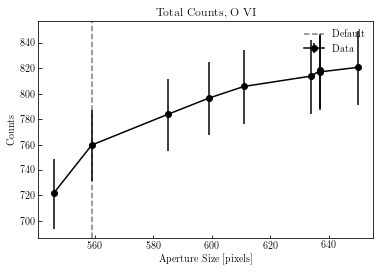

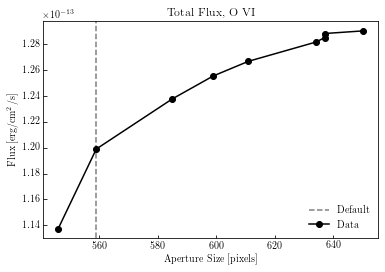

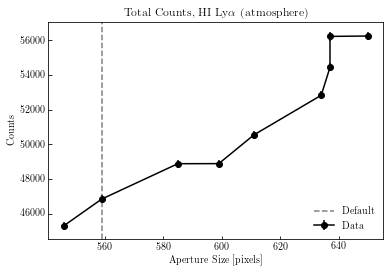

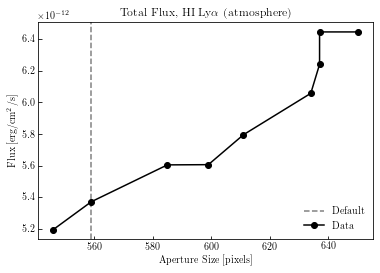

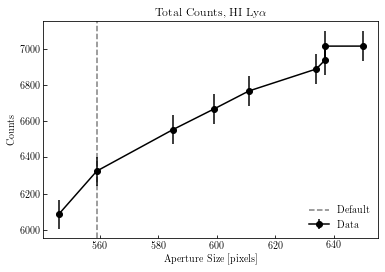

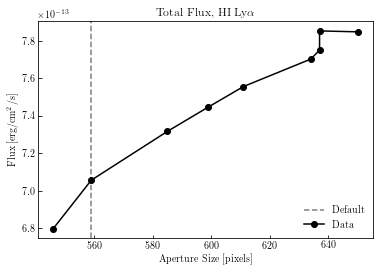

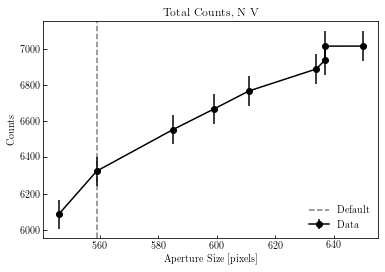

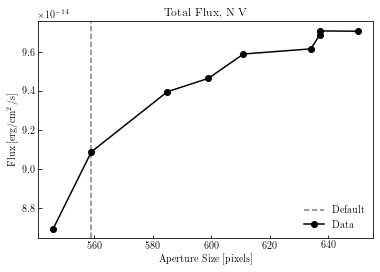

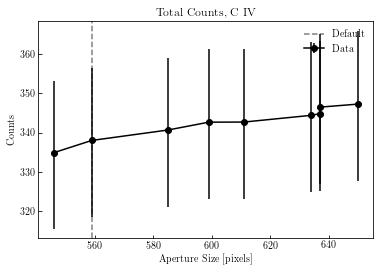

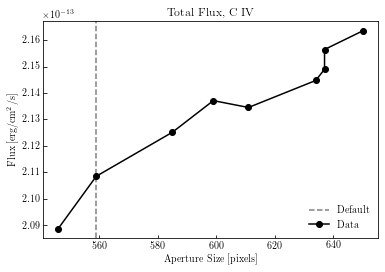

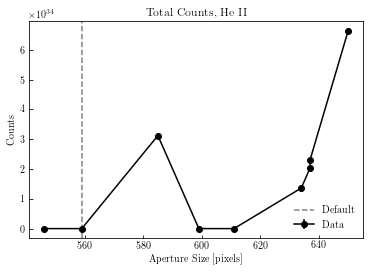

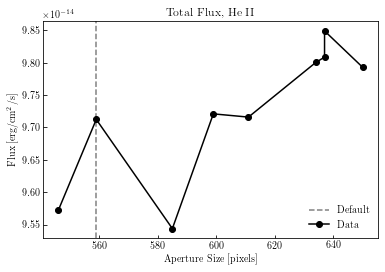

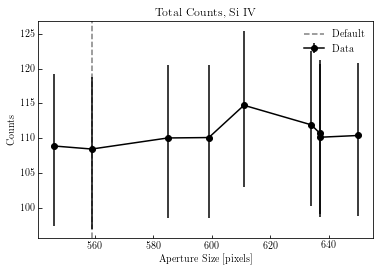

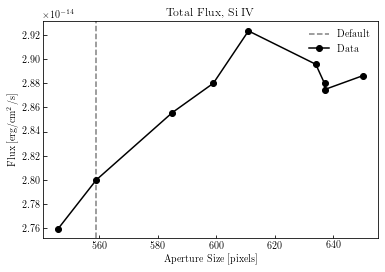

In [5]:
# Plot total line counts and flux as a function of aperture size
for line in lines:
    coeff, _, p = getLineFit(lines[line], wave_cen, comb_data, range(len(percents)))
    flux, counts, counts_errlow, counts_errup = getLineCounts(coeff, p, lines[line], wave_cen, comb_data, range(len(percents)))

    plt.errorbar(aperture_size, counts, yerr=[counts_errup, counts_errlow], label="Data", fmt='ko-', zorder=10)
    plt.axvline(aperture_size[np.argmin(np.abs(1-100*percents))], label="Default", c="grey", ls="--")
    plt.xlabel("Aperture Size [pixels]")
    plt.title("Total Counts, " + line)
    plt.ylabel("Counts")
    plt.legend(frameon=False)
    plt.show()
    plt.errorbar(aperture_size, flux, label="Data", fmt="ko-", zorder=10)
    plt.axvline(aperture_size[np.argmin(np.abs(1-100*percents))], label="Default", c="grey", ls="--")
    plt.xlabel("Aperture Size [pixels]")
    plt.title("Total Flux, " + line)
    plt.ylabel("Flux [erg/cm$^2$/s]")
    plt.legend(frameon=False)
    plt.show()

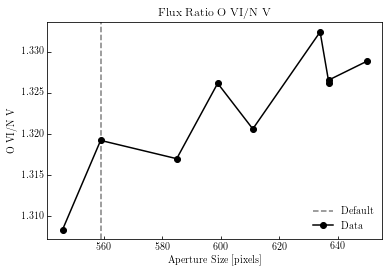

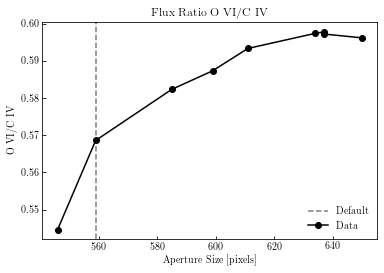

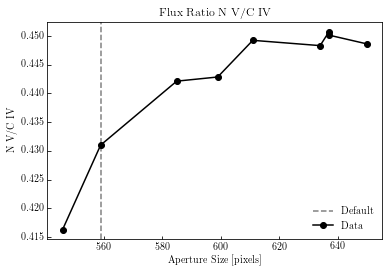

In [6]:
# Plot line ratios as a function of aperture size
ratios = [('O VI', 'N V'), ('O VI', 'C IV'), ('N V', 'C IV')]
for r in ratios:
    coeff1, _, p1 = getLineFit(lines[r[0]], wave_cen, comb_data, range(len(percents)))
    flux1, counts1, _, _ = getLineCounts(coeff1, p1, lines[r[0]], wave_cen, comb_data, range(len(percents)))
    coeff2, _, p2 = getLineFit(lines[r[1]], wave_cen, comb_data, range(len(percents)))
    flux2, counts2, _, _ = getLineCounts(coeff2, p2, lines[r[1]], wave_cen, comb_data, range(len(percents)))

    plt.errorbar(aperture_size, flux1/flux2, label="Data", fmt="ko-", zorder=10)
    plt.axvline(aperture_size[np.argmin(np.abs(1-100*percents))], label="Default", c="grey", ls="--")
    plt.xlabel("Aperture Size [pixels]")
    plt.title("Flux Ratio " + r[0] + "/" + r[1])
    plt.ylabel(r[0] + "/" + r[1])
    plt.legend(frameon=False)
    plt.show()